In [1]:
import networkx as nx

In [2]:
graph = nx.DiGraph()

In [3]:
from sympy import symbols, Symbol
from sympy import Eq
v_perp_e, v_para_e = Symbol("v_{\perp, e}"), Symbol("v_{\parallel, e}")
v_perp_p, v_para_p = Symbol("v_{\perp, p}"), Symbol("v_{\parallel, p}")
v_perp_D, v_para_D = Symbol("v_{\perp, D}"), Symbol("v_{\parallel, D}")
v_perp_T, v_para_T = Symbol("v_{\perp, T}"), Symbol("v_{\parallel, T}")
rho_gr = Symbol(r"\varrho_{gr}")
rho_gr_p = Symbol(r"\varrho_{gr,p}")
m_s, Z_s = symbols("m_{s}, Z_{s}")
m_s1, Z_s1 = symbols("m_{s1}, Z_{s1}")
m_s2, Z_s2 = symbols("m_{s2}, Z_{s2}")
k, T_s = symbols("k, T_{s}")
r_s1_s2 = Symbol("r_{s1,s2}")
m_e, Z_e = symbols("m_{e}, Z_{e}")
m_p, Z_p = symbols("m_{p}, Z_{p}")
m_D, Z_D = symbols("m_{D}, Z_{D}")
m_T, Z_T = symbols("m_{T}, Z_{T}")
n_e, n_i, d_ee, d_ii, d_ei = symbols("n_{e}, n_{i}, d_{ee}, d_{ii}, d_{ei}", real=True)
F_Coulomb, B_ext = symbols("F_{Coulomb}, B_{ext}")
e = Symbol("e")
pi, epsilon_0, vacuum_0 = symbols("\pi, \\varepsilon_{0}, \mu_{0}")

In [4]:
# %matplotlib inline

In [5]:
Z_sum = Symbol("Z_{sum}")

In [6]:

F_pp, F_pe, F_ee = symbols("F_{pp}, F_{pe}, F_{ee}")

In [7]:
rho_gr_p

\varrho_{gr,p}

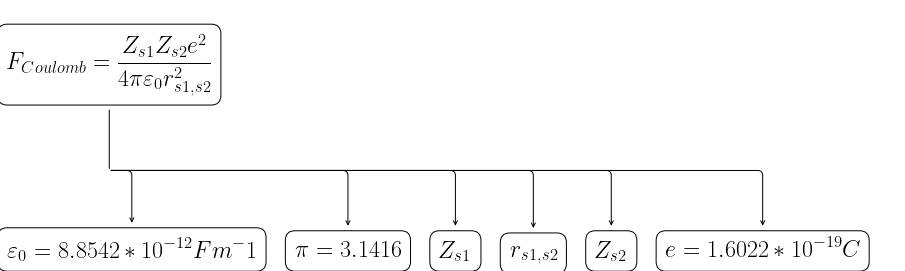

In [8]:
from hifor.graphtool import add_nodes_and_edges_from_Eq
from hifor.draw import draw_hifor
from scipy import constants
from sympy import Float, Rational

Coulomb_DAG = nx.DiGraph()
add_nodes_and_edges_from_Eq(Coulomb_DAG, 
    Eq(F_Coulomb, 1/(4*pi*epsilon_0) * (Z_s1 * Z_s2 * e**2 ) / r_s1_s2**2 )) 
Coulomb_DAG.nodes[e]["val"] = {
    "value": Float( constants.value(u'elementary charge')),
    "unit":           constants.unit(u'elementary charge') }
Coulomb_DAG.nodes[epsilon_0]["val"] = {
    "value": Float( constants.value(u'vacuum electric permittivity')),
    "unit":           constants.unit(u'vacuum electric permittivity') }
Coulomb_DAG.nodes[pi]["val"] = {
    "value": Float( constants.pi),
    "unit":           ""}

fig, ax = draw_hifor(Coulomb_DAG)
fig.savefig("Coulomb_interaction.png", dpi=600, bbox_inches=0) 

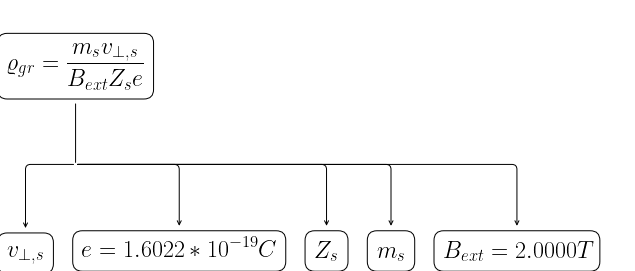

In [9]:
gyro_radius_DAG = nx.DiGraph()
v_perp_s, v_para_s = Symbol("v_{\perp, s}"), Symbol("v_{\parallel, s}")
add_nodes_and_edges_from_Eq(gyro_radius_DAG, 
    Eq(rho_gr, m_s*v_perp_s / (Z_s* e * B_ext) )) 
gyro_radius_DAG.nodes[e]["val"] = {
    "value": Float( constants.value(u'elementary charge')),
    "unit":           constants.unit(u'elementary charge') }
gyro_radius_DAG.nodes[B_ext]["val"] = {
    "value": Float( 2.0 ),
    "unit":  "T" }

fig, ax = draw_hifor(gyro_radius_DAG)
fig.savefig("gyro_radius.png", dpi=600, bbox_inches=0) # bbox_inches=0 from Hooked, StackOverflow, https://stackoverflow.com/a/9295472/12486177

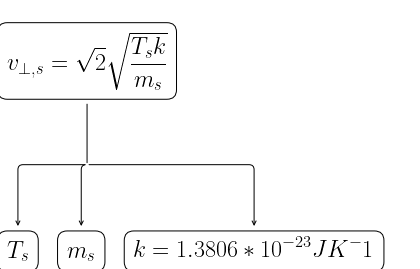

In [10]:
from sympy import sqrt
v_perp_DAG = nx.DiGraph()
add_nodes_and_edges_from_Eq(v_perp_DAG, 
    Eq(v_perp_s, sqrt(2*k*T_s / m_s) )) 
v_perp_DAG.nodes[k]["val"] = {
    "value": Float( constants.value(u'Boltzmann constant')),
    "unit":          constants.unit(u'Boltzmann constant') }

fig, ax = draw_hifor(v_perp_DAG)
fig.savefig("v_perp.png", dpi=600, bbox_inches=0) # bbox_inches=0 from Hooked, StackOverflow, https://stackoverflow.com/a/9295472/12486177

In [11]:
v_perp_DAG.nodes[k]

{'val': {'value': 1.38064900000000e-23, 'unit': 'J K^-1'}, 'height': 0}

In [12]:
from sympy import Float, Rational
add_nodes_and_edges_from_Eq(graph, 
    Eq(d_ee, 1/n_e**(  Rational(1,3) ) )) 
graph.nodes[n_e]["val"] = {
    "value":  Float(1e20),
    "unit":   r"m^{3}"}

In [13]:
from hifor.graphtool import embed_subgraph_into_graph
# embed_subgraph_into_graph(Coulomb_DAG, graph, 
#     F_pp, {r_s1_s2:d_ee, Z_s1:Z_p, Z_s2:Z_p}) 
# embed_subgraph_into_graph(Coulomb_DAG, graph, 
#     F_pe, {r_s1_s2:d_ee, Z_s1:Z_p, Z_s2:Z_e}) 
# embed_subgraph_into_graph(Coulomb_DAG, graph, 
#     F_ee, {r_s1_s2:d_ee, Z_s1:Z_e, Z_s2:Z_e}) 

T_p = symbols("T_{p}")
embed_subgraph_into_graph(v_perp_DAG, graph, 
    v_perp_p, {T_s:T_p, m_s:m_p})
embed_subgraph_into_graph(gyro_radius_DAG, graph, 
    rho_gr_p, {v_perp_s:v_perp_p, Z_s:Z_p, m_s:m_p}) 

In [14]:
# https://docs.scipy.org/doc/scipy/reference/constants.html
# In Python, float data type is of range 2.22507e-308 to 1.79769e+308 and 64 bits, equivalent to double in other languages.


graph.nodes[Z_p]["val"] = {
    "value":  1,
    "unit":           ""}
graph.nodes[T_p]["val"] = {
    "value":  Float(1e5),
    "unit":   "K"}
graph.nodes[m_p]["val"]  = {
    "value": Float( constants.value(u'proton mass')),
    "unit":          constants.unit(u'proton mass') }
# graph.nodes[Z_e]["val"] = {
#     "value":  1,
#     "unit":           ""}
graph.nodes[d_ee]["val"] = {
    "value":  Float(1e-6),
    "unit":           "m"}

In [15]:
from hifor.calc import calc_value_of_node, calc_values_of_whole_graph
# calc_value_of_node(graph, F_pp)
# calc_value_of_node(graph, F_pe)
# calc_value_of_node(graph, F_ee)
calc_values_of_whole_graph(graph)

In [16]:
nx.is_directed_acyclic_graph(graph)

True

In [18]:
graph.nodes[rho_gr_p]["val"]["unit"] = "m"
graph.nodes[v_perp_p]["val"]["unit"] = "m/s"

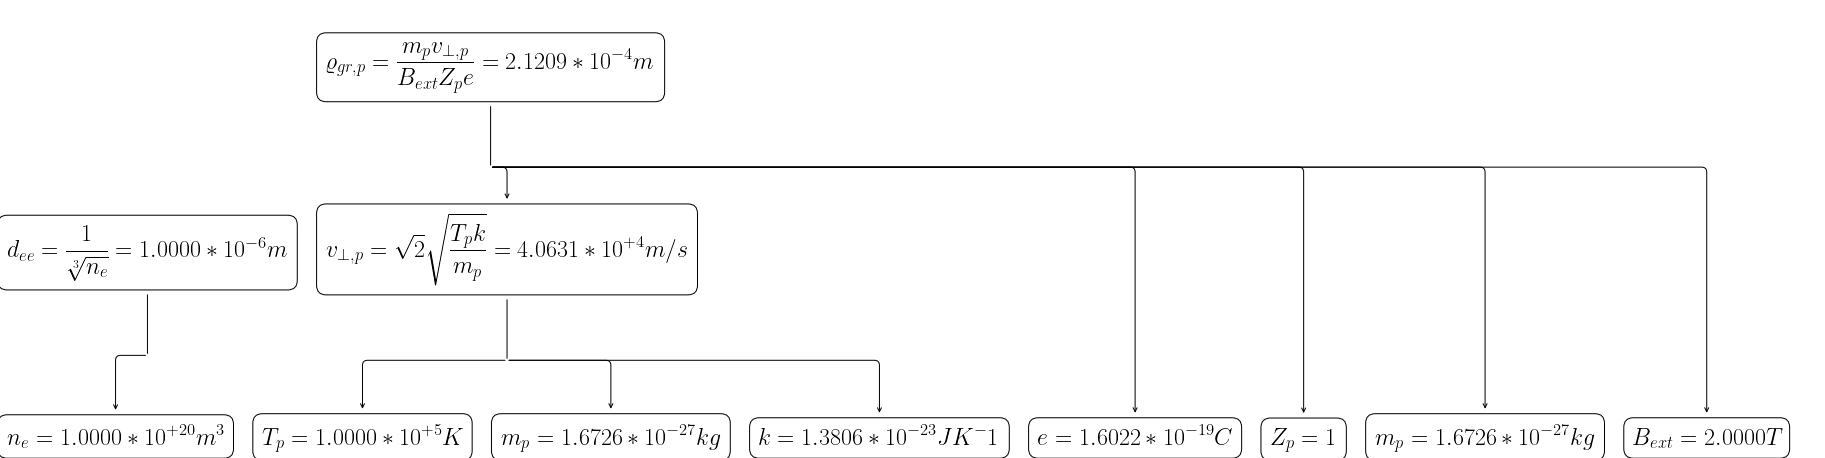

In [19]:
from hifor.draw import draw_hifor


fig, ax = draw_hifor(graph)
fig.savefig("whole_graph.png", dpi=600, bbox_inches=0) # bbox_inches=0 from Hooked, StackOverflow, https://stackoverflow.com/a/9295472/12486177